# Рубежный контроль №1
## Казицин Алексей ИУ5-62Б
## Вариант №7

Задача №1. Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель. Для произвольной колонки данных построить гистограмму.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('googleplaystore.csv', sep=',')

In [3]:
# Первые 5 строк датасета
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
data.shape

(10841, 13)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 10841


In [6]:
# Список колонок
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
data.drop(['App','Current Ver','Last Updated',"Type","Content Rating","Category","Genres","Android Ver"],axis=1,inplace=True)
data = data[data['Installs'] != 'Free']
data.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19M,"10,000+",0
1,3.9,967,14M,"500,000+",0
2,4.7,87510,8.7M,"5,000,000+",0
3,4.5,215644,25M,"50,000,000+",0
4,4.3,967,2.8M,"100,000+",0


In [8]:
#data.drop(['App','Current Ver','Last Updated',"Type","Content Rating","Category","Genres","Android Ver"],axis=1,inplace=True)


data["Size"] = data["Size"].apply(lambda x: float("NaN") if  x == 'Varies with device' else float(x.replace(',','')[:-1]))

# удаляем строки, в которых Reviews или Price имеют значение None
data = data.dropna(subset=['Reviews', 'Price'])

#data["Installs"] = data["Installs"].apply(lambda x: int(x[:-1].replace(",","")))
data['Installs'] = data['Installs'].apply(lambda x: float(x.replace(',', '').rstrip('+')) if x.replace(',', '').rstrip('+').isdigit() else x)
# Преобразовываем значения в колонке Reviews в float, если это возможно, иначе удаляем строку
data['Reviews'] = data['Reviews'].apply(lambda x: float(x) if str(x).isdigit() else None)

# Преобразовываем значения в колонке Price в float, если это возможно, иначе удаляем строку
#data['Price'] = data['Price'].apply(lambda x: float(x) if str(x).isdigit() else None)
data["Price"] = data["Price"].apply(lambda x: float(x[1:]) if x != '0' else 0)


In [9]:
data.head()

,Rating,Reviews,Size,Installs,Price
0,4.1,159.0,19.0,10000.0,0.0
1,3.9,967.0,14.0,500000.0,0.0
2,4.7,87510.0,8.7,5000000.0,0.0
3,4.5,215644.0,25.0,50000000.0,0.0
4,4.3,967.0,2.8,100000.0,0.0


In [10]:
# Список колонок с типами данных
data.dtypes

Rating      float64
Reviews     float64
Size        float64
Installs    float64
Price       float64
dtype: object

In [11]:
# Проверим наличие пустых значений
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Rating - 1474
Reviews - 0
Size - 1695
Installs - 0
Price - 0


In [12]:
#искуственно создадим пустые значения
df_with_missing = data.mask(np.random.random(data.shape) < 0.02)

In [13]:
for col in df_with_missing.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df_with_missing[df_with_missing[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Rating - 1657
Reviews - 186
Size - 1849
Installs - 199
Price - 216


In [14]:
# удалим пустые значения
cleaned_df = df_with_missing.dropna()

In [15]:
for col in cleaned_df.columns:
    # количество пустых значений - все значения заполнены
    temp_null_count = cleaned_df[cleaned_df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))
total_count = cleaned_df.shape[0]
print('Всего строк: {}'.format(total_count))

Rating - 0
Reviews - 0
Size - 0
Installs - 0
Price - 0
Всего строк: 7040


In [16]:
# Определим уникальные значения для целевого признака
cleaned_df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 4.2, 4.6, 3.2, 4. , 4.8, 3.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 3. , 1.9, 2.5, 2.8, 2.7, 1. ,
       2.9, 2.6, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

C:\Users\lesha\AppData\Local\Temp\ipykernel_26956\233987559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df['Rating'])
C:\Users\lesha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rating', ylabel='Density'>

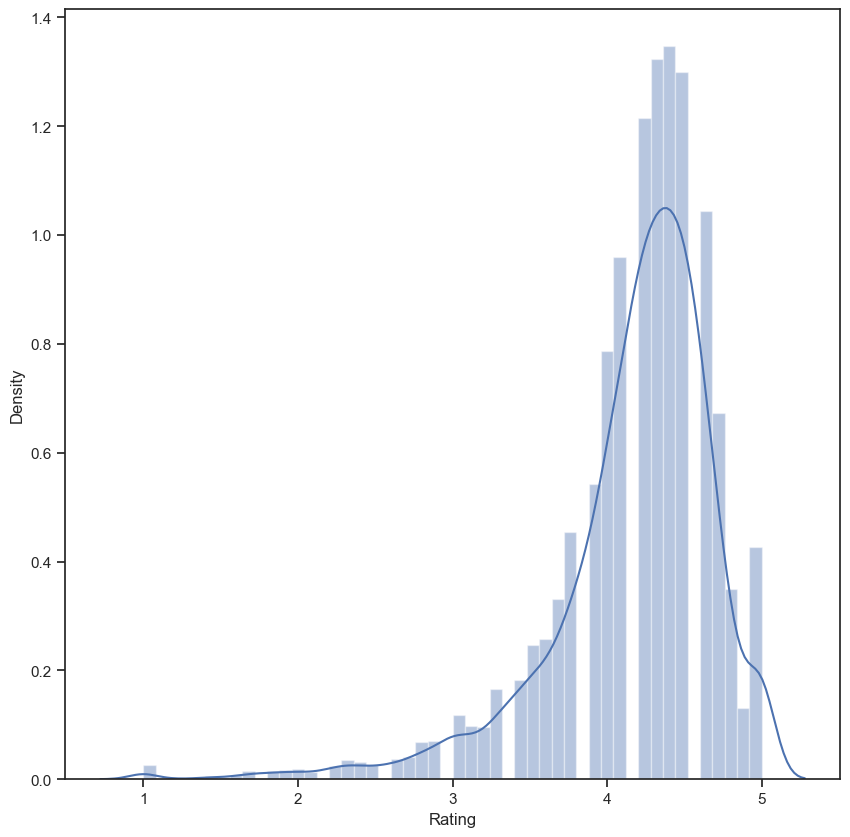

In [17]:
#ДОП ЗАДАНИЕ, ГИСТОГРАММА
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(cleaned_df['Rating'])

<Axes: >

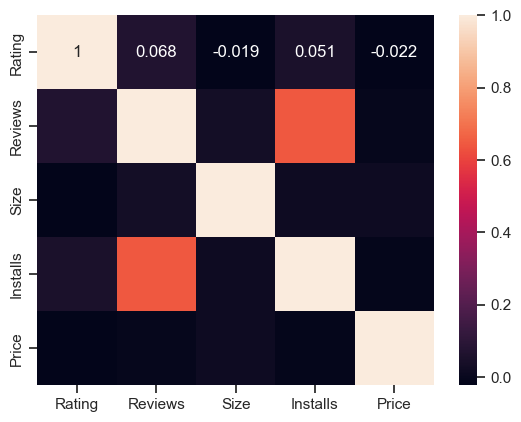

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
data.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068141,-0.018843,0.051355,-0.021903
Reviews,0.068141,1.000000,0.032105,0.643122,-0.009667
Size,-0.018843,0.032105,1.000000,0.014753,0.014495
Installs,0.051355,0.643122,0.014753,1.000000,-0.011689
Price,-0.021903,-0.009667,0.014495,-0.011689,1.000000


Единственные переменные, между которыми наблюдается корреляция, это количество установок и количество отзывов, что вполне логично. Однако корреляция между рейтингом и другими переменными практически отсутствует. Нельзя выделить влияние чего либо ввиду недостатка категориальных признаков.